# Forecasting Assignment-2 
Forecast the CocaCola prices and Airlines Passengers data set. Prepare
 a document for each model explaining 
how many dummy variables you have created and RMSE value for each model.
Finally which model you will use for 
Forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import statsmodels.formula.api as smf 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
# We will extract Quarter values and Year values separately from 'Quarter column'
df['Quarters'] = 0
df['Year'] = 0
for i in range(42):
    p = df["Quarter"][i]
    df['Quarters'][i]= p[0:2]
    df['Year'][i]= p[3:5]

df.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [4]:
# Getting dummy variables for Quarters Q1, Q2, Q3, Q4 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(df['Quarters']))
df = pd.concat([df,Quarters_Dummies],axis = 1)
df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


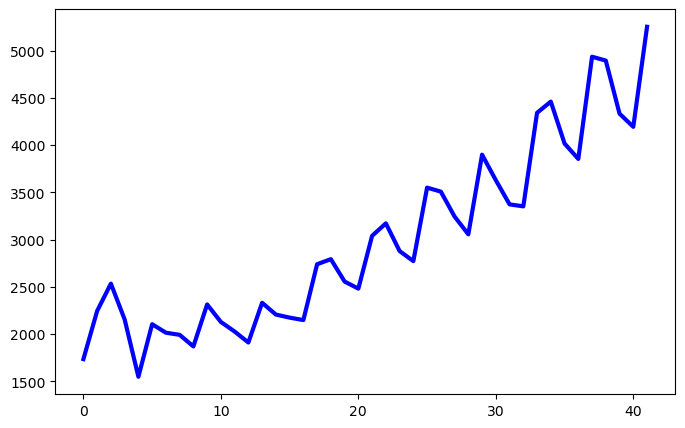

In [5]:
# Lineplot for Sales of CocaCola
plt.figure(figsize=(8,5))
plt.plot(df['Sales'], color = 'blue', linewidth=3)

<Axes: >

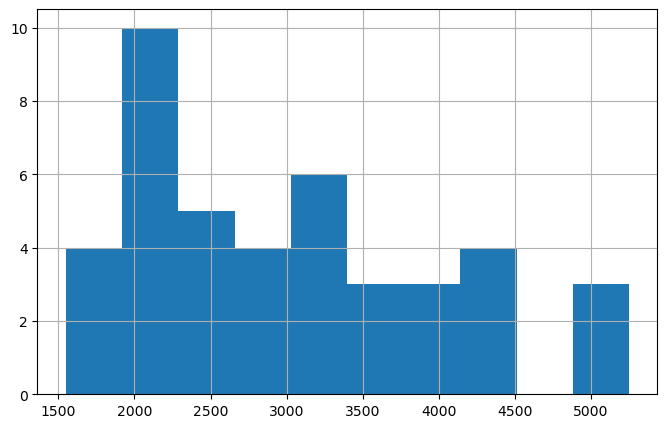

In [6]:
# Histogram
df['Sales'].hist(figsize=(8,5))

<Axes: ylabel='Density'>

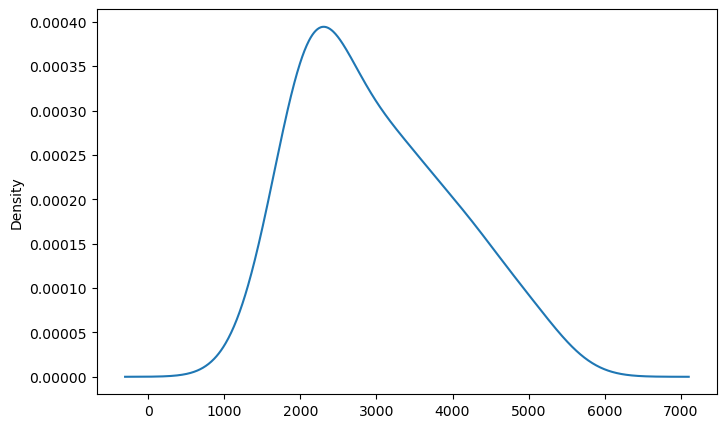

In [7]:
# Density Plot
df['Sales'].plot(kind = 'kde', figsize=(8,5))

<Axes: xlabel='Quarters', ylabel='Sales'>

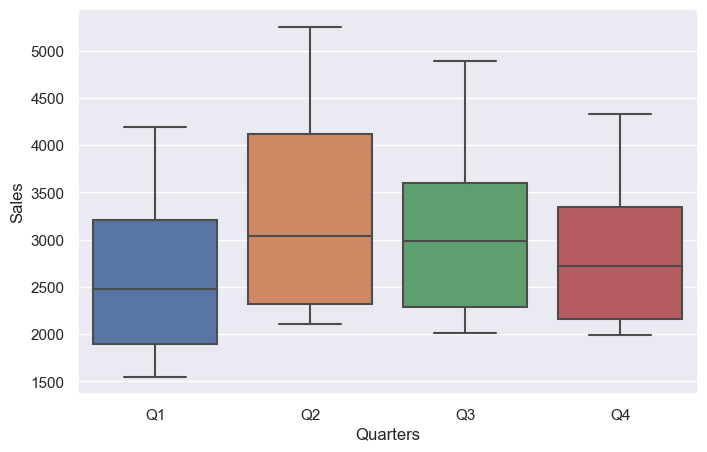

In [8]:
#boxplot of Quarters Vs. Sales
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="Quarters",y="Sales",data=df)

<Axes: xlabel='Year', ylabel='Sales'>

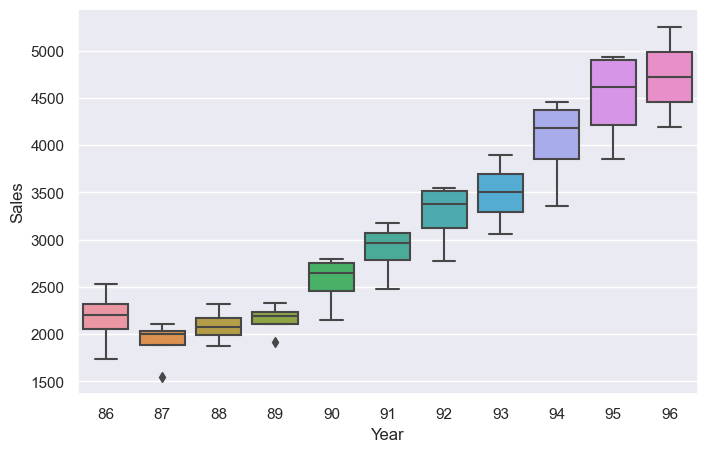

In [9]:
# boxplot of Years Vs. Sales
sns.boxplot(x="Year",y="Sales",data=df)

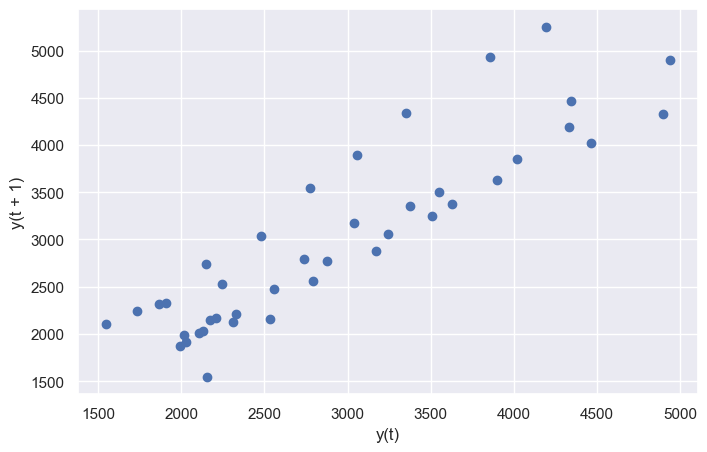

In [10]:
##--lagplot
lag_plot(df['Sales'])
plt.show()

<Axes: xlabel='Quarters', ylabel='Year'>

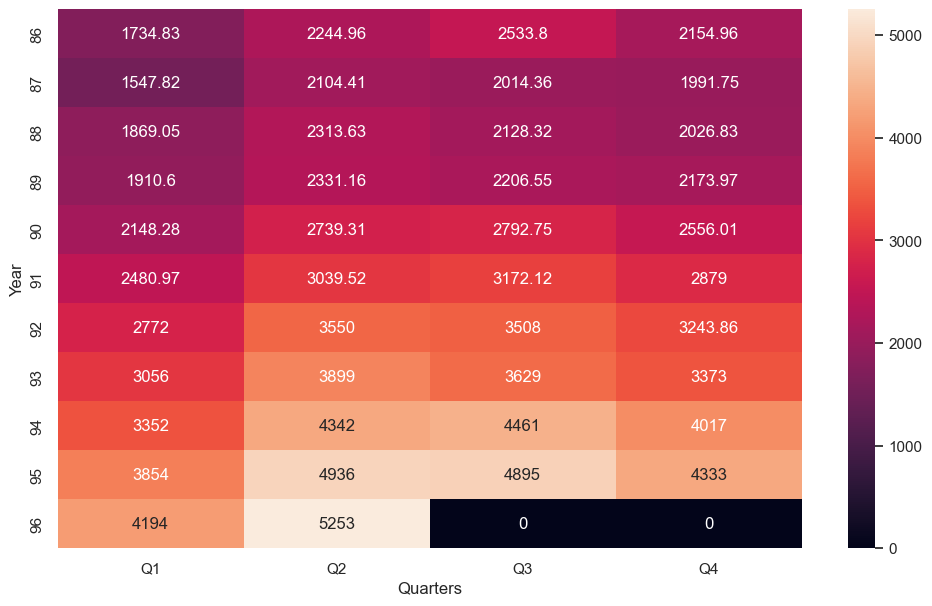

In [11]:
##--Heat map
plt.figure(figsize=(12, 7))
heatmap_y_month = pd.pivot_table(data=df,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

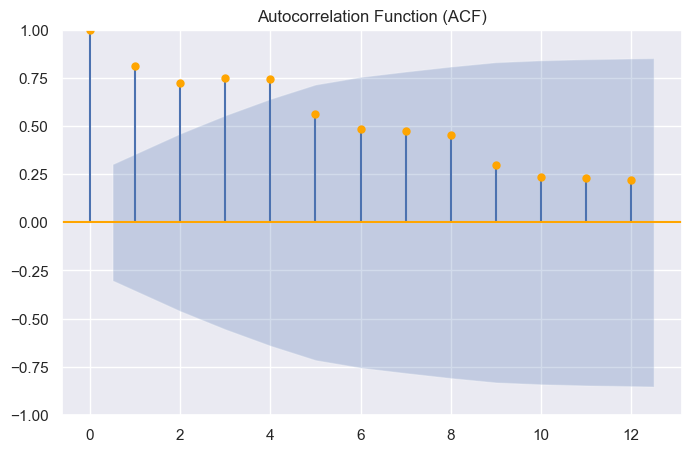

In [12]:
tsa_plots.plot_acf(df.Sales, lags=12, color='Orange')
plt.title('Autocorrelation Function (ACF)')
plt.show()

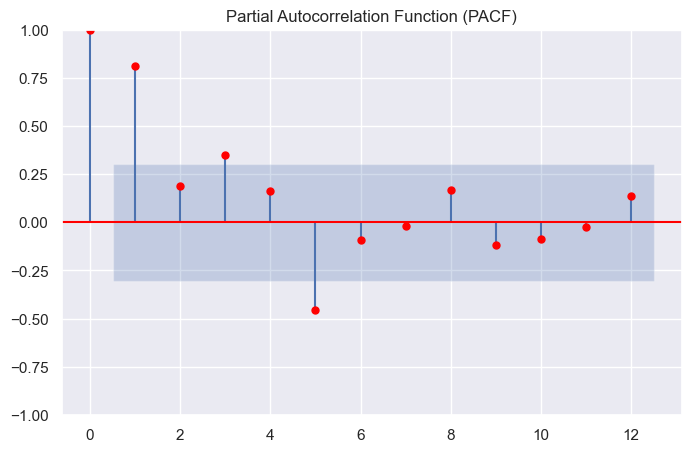

In [13]:
# Plot PACF with colors
tsa_plots.plot_pacf(df.Sales, lags=12, color='red')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [14]:
# Splitting data into Train and Test (77/33)
Train = df.head(32)
Test = df.tail(10)

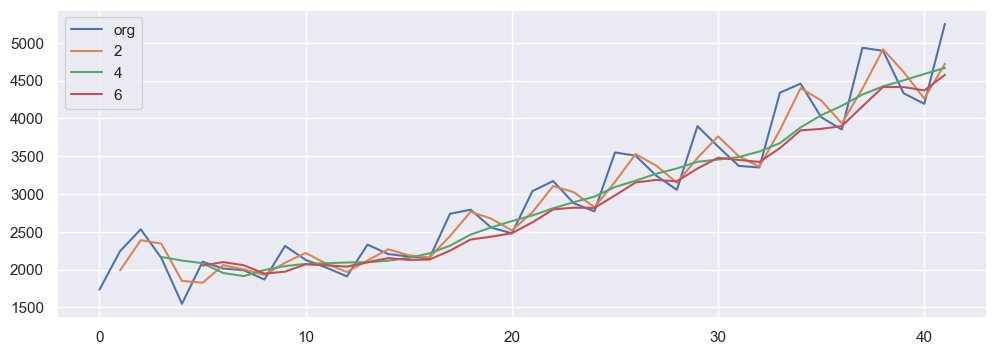

In [15]:
plt.figure(figsize=(12,4))
df.Sales.plot(label="org")
for i in range(2,8,2):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

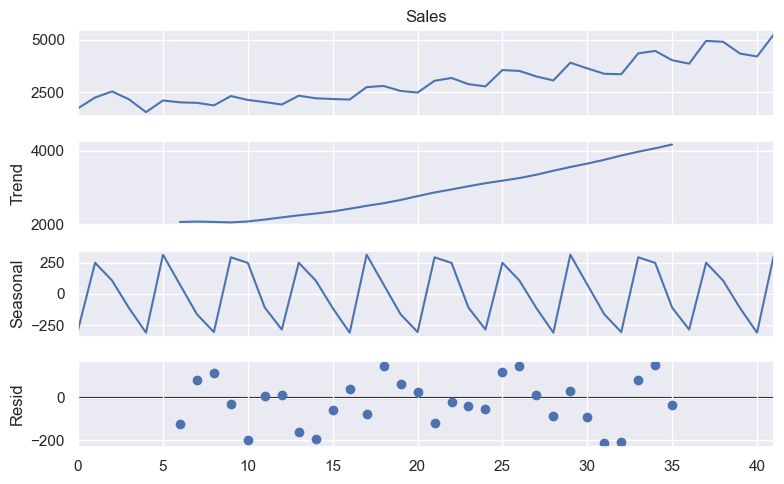

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(df.Sales,period=12)
decompose_ts_add.plot()
plt.show()

In [17]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

In [18]:
##--Simple Exponential method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Sales, pred_ses)
rmse_ses_model

1033.6706452499134

In [19]:
#--holt method
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Sales, pred_hw)
rmse_hw_model

892.3222879760425

In [20]:
##--Holt method with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Sales, pred_hwe_add_add)
rmse_hwe_add_add_model

610.227144270313

In [22]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Sales, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model


569.0540408448411

In [23]:
# Data preprocessing for models
df["t"] = np.arange(1,43)
df["t_squared"] = df["t"]*df["t"]

df["log_sales"] = np.log(df["Sales"])

df.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [24]:
# Splitting data into Train and Test (77/33)
Train = df.head(32)
Test = df.tail(10)
Train.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [25]:
###--linear model
linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Sales'], pred_linear)
rmse_linear_model

752.9233932767115

In [26]:
##--Exponential model
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_Exp_model

590.3316432076576

In [27]:
###---Quadratic model
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Sales'], pred_Quad)
rmse_Quad_model

457.73573554072897

In [28]:
##-Additive model
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3']]))
rmse_add_sea = RMSE(Test['Sales'], pred_add_sea)
rmse_add_sea

1850.4665461858353

In [29]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_Quad_model = RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_Quad_model 

277.3510771128774

In [30]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.250394836116

In [31]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

448.867818269187

In [32]:
#Compare the results 
data = {"MODEL":pd.Series(["rmse_linear_model","rmse_Exp_model","rmse_Quad_model","rmse_add_sea","rmse_add_sea_quad_model","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":
        pd.Series([rmse_linear_model,rmse_Exp_model,rmse_Quad_model,rmse_add_sea,rmse_add_sea_Quad_model,rmse_Mult_sea,rmse_Mult_add_sea])}
type(data)

table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad_model,277.351077
6,rmse_Mult_add_sea,448.867818
2,rmse_Quad_model,457.735736
1,rmse_Exp_model,590.331643
0,rmse_linear_model,752.923393
3,rmse_add_sea,1850.466546
5,rmse_Mult_sea,1908.250395


## --Inferences 
4	rmse_add_sea_quad_model	277.351077
6	rmse_Mult_add_sea	448.867818
2	rmse_Quad_model	457.735736
1	rmse_Exp_model	590.331643
0	rmse_linear_model	752.923393
3	rmse_add_sea	1850.466546
5	rmse_Mult_sea	1908.25039